In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# columns = ['id','auth','age','college','black','4G','use_age','consume1',
#            'consume2','consume3','consume4','consume5','consume6','consume7',
#            'chat_n','market','t_market','c1','c2','c3','c4','c5',
#            'b1','b2','b3','b4','b5','b6','b7','score']
columns = ['id','auth','age','college','black','4G','use_age',
           'lasted_pay','lasted_pay_money','ave_6','bill_now','surplus','arrears','sensity',
           'chat_num','market','show_3','wanda','sam','movie','tour','gym',
           'netshopping','express','finance','vedio','airplane','subway','vistor','score']
train = pd.read_csv(r'E:\TIANCHI\MOBILE\train_dataset.csv',names=columns)
train.head()

,id,auth,age,college,black,4G,use_age,lasted_pay,lasted_pay_money,ave_6,...,tour,gym,netshopping,express,finance,vedio,airplane,subway,vistor,score
0,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,...,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数,信用分
1,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.8,163.86,...,1,1,713,0,2740,7145,0,0,30,664
2,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,...,0,0,414,0,2731,44862,0,0,0,530
3,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.9,109.64,...,0,0,3391,0,0,4804,0,0,1,643
4,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.8,92.97,...,1,1,500,0,1931,3141,0,0,5,649


In [4]:
type(train)

pandas.core.frame.DataFrame

*去除原始的标签信息*
参考[去除dataframe某一行](https://blog.csdn.net/songyunli1111/article/details/79306639)

In [5]:
train.drop(index=0,inplace=True)
train.head()

,id,auth,age,college,black,4G,use_age,lasted_pay,lasted_pay_money,ave_6,...,tour,gym,netshopping,express,finance,vedio,airplane,subway,vistor,score
1,a4651f98c82948b186bdcdc8108381b4,1,44,0,0,0,186,1,99.8,163.86,...,1,1,713,0,2740,7145,0,0,30,664
2,aeb10247db4e4d67b2550bbc42ff9827,1,18,0,0,1,5,1,29.94,153.28,...,0,0,414,0,2731,44862,0,0,0,530
3,5af23a1e0e77410abb25e9a7eee510aa,1,47,0,0,0,145,1,49.9,109.64,...,0,0,3391,0,0,4804,0,0,1,643
4,43c64379d3c24a15b8478851b22049e4,1,55,0,0,0,234,1,99.8,92.97,...,1,1,500,0,1931,3141,0,0,5,649
5,f1687f3b8a6f4910bd0b13eb634056e2,1,40,0,0,0,76,1,49.9,95.47,...,1,0,522,0,64,59,0,0,0,648


In [6]:
train.describe()

,id,auth,age,college,black,4G,use_age,lasted_pay,lasted_pay_money,ave_6,...,tour,gym,netshopping,express,finance,vedio,airplane,subway,vistor,score
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,...,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,50000,4,160,4,4,4,560,4,386,26088,...,4,4,8724,269,8552,14279,203,192,967,533
top,822928c5436840079cde6e97eb3e96ea,1,29,0,0,0,7,1,0,18,...,0,0,0,0,0,0,0,0,0,640
freq,1,32433,1453,32647,31188,29863,391,23060,9558,138,...,17263,20538,5223,32288,6000,5672,32339,31166,20044,395


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 30 columns):
id                  50000 non-null object
auth                50000 non-null object
age                 50000 non-null object
college             50000 non-null object
black               50000 non-null object
4G                  50000 non-null object
use_age             50000 non-null object
lasted_pay          50000 non-null object
lasted_pay_money    50000 non-null object
ave_6               50000 non-null object
bill_now            50000 non-null object
surplus             50000 non-null object
arrears             50000 non-null object
sensity             50000 non-null object
chat_num            50000 non-null object
market              50000 non-null object
show_3              50000 non-null object
wanda               50000 non-null object
sam                 50000 non-null object
movie               50000 non-null object
tour                50000 non-null object
gym      

**这里读出来的数据应该都是数值型的！**

In [8]:
train.drop(columns='id',axis=1,inplace=True)
train = pd.DataFrame(train.iloc[:,:],dtype=np.float)

In [9]:
train.head()

,auth,age,college,black,4G,use_age,lasted_pay,lasted_pay_money,ave_6,bill_now,...,tour,gym,netshopping,express,finance,vedio,airplane,subway,vistor,score
1,1.0,44.0,0.0,0.0,0.0,186.0,1.0,99.80,163.86,159.20,...,1.0,1.0,713.0,0.0,2740.0,7145.0,0.0,0.0,30.0,664.0
2,1.0,18.0,0.0,0.0,1.0,5.0,1.0,29.94,153.28,145.10,...,0.0,0.0,414.0,0.0,2731.0,44862.0,0.0,0.0,0.0,530.0
3,1.0,47.0,0.0,0.0,0.0,145.0,1.0,49.90,109.64,120.20,...,0.0,0.0,3391.0,0.0,0.0,4804.0,0.0,0.0,1.0,643.0
4,1.0,55.0,0.0,0.0,0.0,234.0,1.0,99.80,92.97,167.42,...,1.0,1.0,500.0,0.0,1931.0,3141.0,0.0,0.0,5.0,649.0
5,1.0,40.0,0.0,0.0,0.0,76.0,1.0,49.90,95.47,101.00,...,1.0,0.0,522.0,0.0,64.0,59.0,0.0,0.0,0.0,648.0


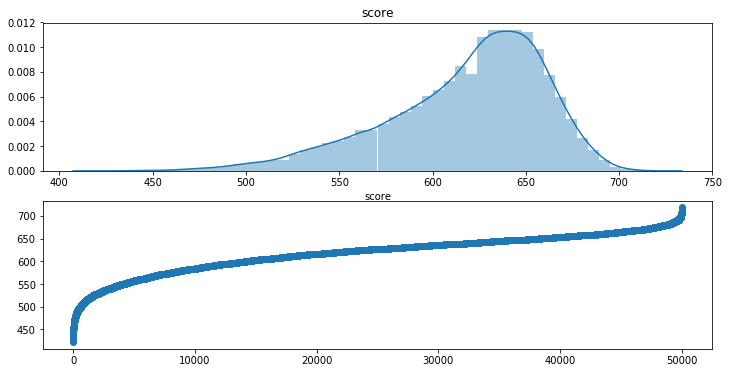

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.title('score')
sns.distplot(train['score'])
plt.subplot(212)
plt.scatter(range(train.shape[0]),np.sort(train['score'].values))
plt.show()

In [11]:
train.describe()

,auth,age,college,black,4G,use_age,lasted_pay,lasted_pay_money,ave_6,bill_now,...,tour,gym,netshopping,express,finance,vedio,airplane,subway,vistor,score
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,...,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,...,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,...,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,...,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,...,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,...,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


In [12]:
train_copy = train.copy()

In [13]:
auth0 = train_copy[train_copy['auth']<1]

In [14]:
type(auth0['score'])

pandas.core.series.Series

In [15]:
type(auth0['score'].to_frame())

pandas.core.frame.DataFrame

[Series转Dataframe](https://blog.csdn.net/dta0502/article/details/82966790)

In [16]:
auth0_score = auth0['score'].to_frame().describe()

In [17]:
auth0_score

,score
count,489.000000
mean,605.699387
std,36.564249
min,490.000000
25%,582.000000
50%,608.000000
75%,632.000000
max,693.000000


In [18]:
train_copy[train_copy['black']==1]['score'].to_frame().head()

,score
38,642.0
75,661.0
78,615.0
85,644.0
93,663.0


In [19]:
train_copy[train_copy['black']==1].count()

auth                2440
age                 2440
college             2440
black               2440
4G                  2440
use_age             2440
lasted_pay          2440
lasted_pay_money    2440
ave_6               2440
bill_now            2440
surplus             2440
arrears             2440
sensity             2440
chat_num            2440
market              2440
show_3              2440
wanda               2440
sam                 2440
movie               2440
tour                2440
gym                 2440
netshopping         2440
express             2440
finance             2440
vedio               2440
airplane            2440
subway              2440
vistor              2440
score               2440
dtype: int64

*也就是说5w人里有2440人上了客户黑名单*

In [20]:
train_copy[train_copy['black']==1]['score'].describe()

count    2440.000000
mean      638.768033
std        35.286775
min       457.000000
25%       623.000000
50%       646.000000
75%       662.000000
max       710.000000
Name: score, dtype: float64

In [21]:
c_score = train_copy[train_copy['black']==1]['score']
c_score[c_score<627].count()

694

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029CA7357400>,
      dtype=object)

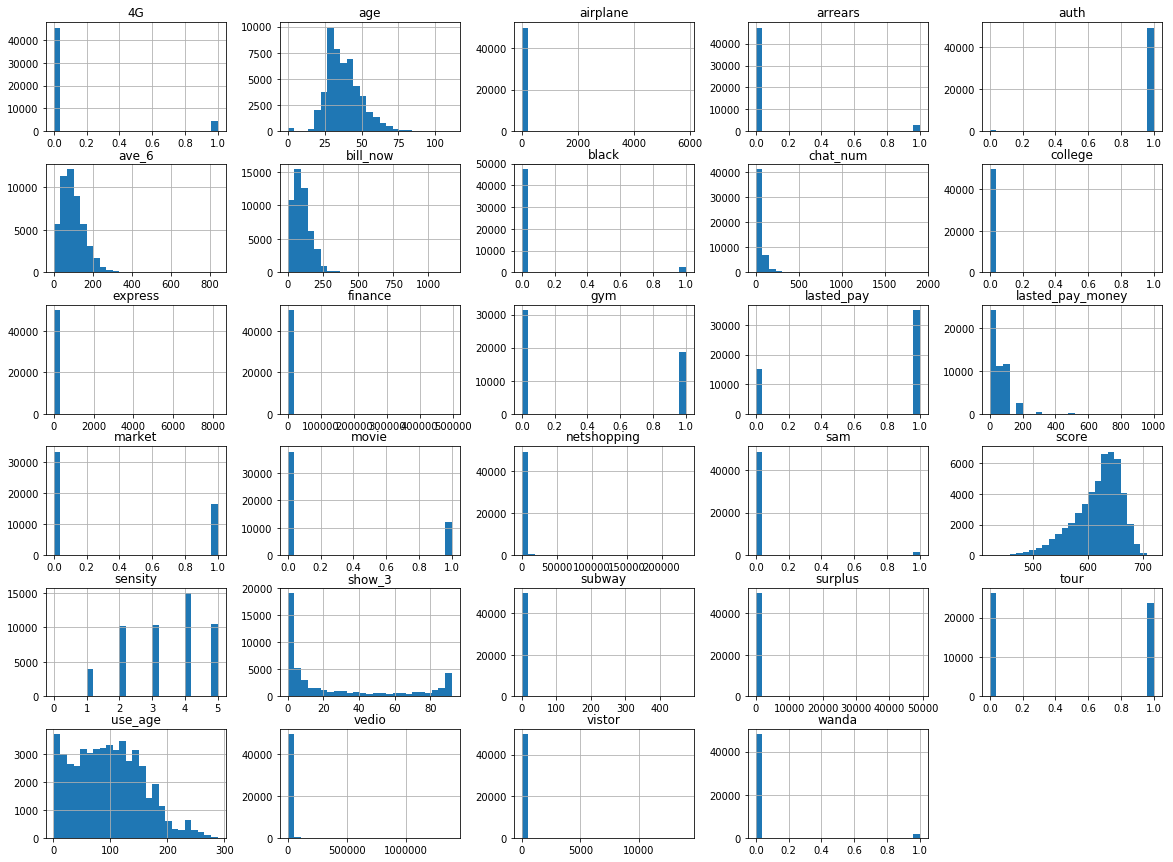

In [22]:
train_copy.hist(figsize=(20,15),bins=25,grid=True)

In [36]:
train_copy['use_age'].describe()

count    50000.000000
mean        96.448680
std         59.176593
min          1.000000
25%         48.000000
50%         94.000000
75%        139.000000
max        288.000000
Name: use_age, dtype: float64

In [37]:
train_copy[train_copy['use_age']>139]['score'].describe()

count    12431.000000
mean       644.903869
std         30.107301
min        486.000000
25%        629.000000
50%        650.000000
75%        666.000000
max        719.000000
Name: score, dtype: float64

In [38]:
train_copy.describe()

,auth,age,college,black,4G,use_age,consume1,consume2,consume3,consume4,...,c4,c5,b1,b2,b3,b4,b5,b6,b7,score
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,...,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,...,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,...,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,...,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,...,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,...,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


In [40]:
y = train_copy['score']
y.describe()

count    50000.000000
mean       618.053060
std         42.443022
min        422.000000
25%        594.000000
50%        627.000000
75%        649.000000
max        719.000000
Name: score, dtype: float64

In [41]:
X = train_copy.drop(columns='score')
X.describe()

,auth,age,college,black,4G,use_age,consume1,consume2,consume3,consume4,...,c3,c4,c5,b1,b2,b3,b4,b5,b6,b7
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,...,0.242280,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,...,0.428467,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,...,0.000000,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,...,0.000000,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,...,0.000000,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,...,1.000000,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000


In [25]:
train_copy['ave_6'].to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1 to 50000
Data columns (total 1 columns):
ave_6    50000 non-null float64
dtypes: float64(1)
memory usage: 781.2 KB


In [26]:
train_copy['ave_6'].describe()

count    50000.000000
mean        98.732081
std         60.757758
min          0.000000
25%         54.180000
50%         89.320000
75%        131.160000
max        840.570000
Name: ave_6, dtype: float64

In [27]:
train_copy['bill_now'].describe()

count    50000.000000
mean        99.575130
std         65.327335
min          0.000000
25%         52.675000
50%         89.620000
75%        133.945000
max       1164.290000
Name: bill_now, dtype: float64

In [28]:
train_copy['use_age'].describe()

count    50000.000000
mean        96.448680
std         59.176593
min          1.000000
25%         48.000000
50%         94.000000
75%        139.000000
max        288.000000
Name: use_age, dtype: float64

In [29]:
train_copy['show_3'].describe()

count    50000.000000
mean        26.572520
std         32.789251
min          0.000000
25%          1.000000
50%          8.000000
75%         50.000000
max         92.000000
Name: show_3, dtype: float64

In [30]:
train_copy['chat_num'].describe()

count    50000.000000
mean        48.054500
std         54.208524
min          1.000000
25%         16.000000
50%         32.000000
75%         61.000000
max       1906.000000
Name: chat_num, dtype: float64

In [31]:
train_copy['lasted_pay_money'].describe()

count    50000.000000
mean        53.415929
std         61.812022
min          0.000000
25%          0.000000
50%         49.900000
75%         99.800000
max        998.000000
Name: lasted_pay_money, dtype: float64

In [32]:
from sklearn.decomposition import PCA

In [33]:
PCA(n_components=10).fit_transform(train_copy)

array([[ 3.79253400e+03, -3.99834524e+02,  1.74763371e+03, ...,
         3.16339392e+00, -1.86346737e+00, -2.54865851e+01],
       [ 4.13916440e+04, -3.32272933e+03,  1.09754889e+03, ...,
        -2.92946974e+01, -2.74322429e+00, -1.18067291e+01],
       [ 1.55215438e+03,  1.94529937e+03, -1.35789192e+03, ...,
        -1.28416220e+01, -1.51611923e+00, -1.73139296e+01],
       ...,
       [-3.42686990e+03, -1.05774657e+03, -7.00274619e+02, ...,
        -4.84047798e+01, -2.97901649e+00, -5.30763988e+01],
       [-3.44832913e+03, -1.04545136e+03, -7.07163577e+02, ...,
         8.06907000e+01,  9.13915693e-01, -4.31669664e+00],
       [-3.05871746e+03, -6.94400589e+02, -4.92863237e+02, ...,
         8.76213817e+01,  1.21243609e+00,  3.36295758e+01]])

In [34]:
train_copy.describe()

,auth,age,college,black,4G,use_age,lasted_pay,lasted_pay_money,ave_6,bill_now,...,tour,gym,netshopping,express,finance,vedio,airplane,subway,vistor,score
count,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.00000,50000.000000,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.99022,37.883440,0.003720,0.048800,0.088580,96.448680,0.700100,53.415929,98.732081,99.575130,...,0.47442,0.37412,1148.815260,1.197840,971.50308,3.366519e+03,0.704420,0.553340,19.117120,618.053060
std,0.09841,11.613239,0.060879,0.215452,0.284139,59.176593,0.458218,61.812022,60.757758,65.327335,...,0.49935,0.48390,3992.957952,44.469584,3006.16776,1.151006e+04,28.721302,7.735913,170.074772,42.443022
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,422.000000
25%,1.00000,30.000000,0.000000,0.000000,0.000000,48.000000,0.000000,0.000000,54.180000,52.675000,...,0.00000,0.00000,18.000000,0.000000,6.00000,1.000000e+01,0.000000,0.000000,0.000000,594.000000
50%,1.00000,36.000000,0.000000,0.000000,0.000000,94.000000,1.000000,49.900000,89.320000,89.620000,...,0.00000,0.00000,250.000000,0.000000,267.00000,3.350000e+02,0.000000,0.000000,0.000000,627.000000
75%,1.00000,45.000000,0.000000,0.000000,0.000000,139.000000,1.000000,99.800000,131.160000,133.945000,...,1.00000,1.00000,932.000000,0.000000,1147.25000,2.423250e+03,0.000000,0.000000,4.000000,649.000000
max,1.00000,111.000000,1.000000,1.000000,1.000000,288.000000,1.000000,998.000000,840.570000,1164.290000,...,1.00000,1.00000,234336.000000,8235.000000,496238.00000,1.382227e+06,5856.000000,474.000000,13965.000000,719.000000


## 所有特征的相关度分析

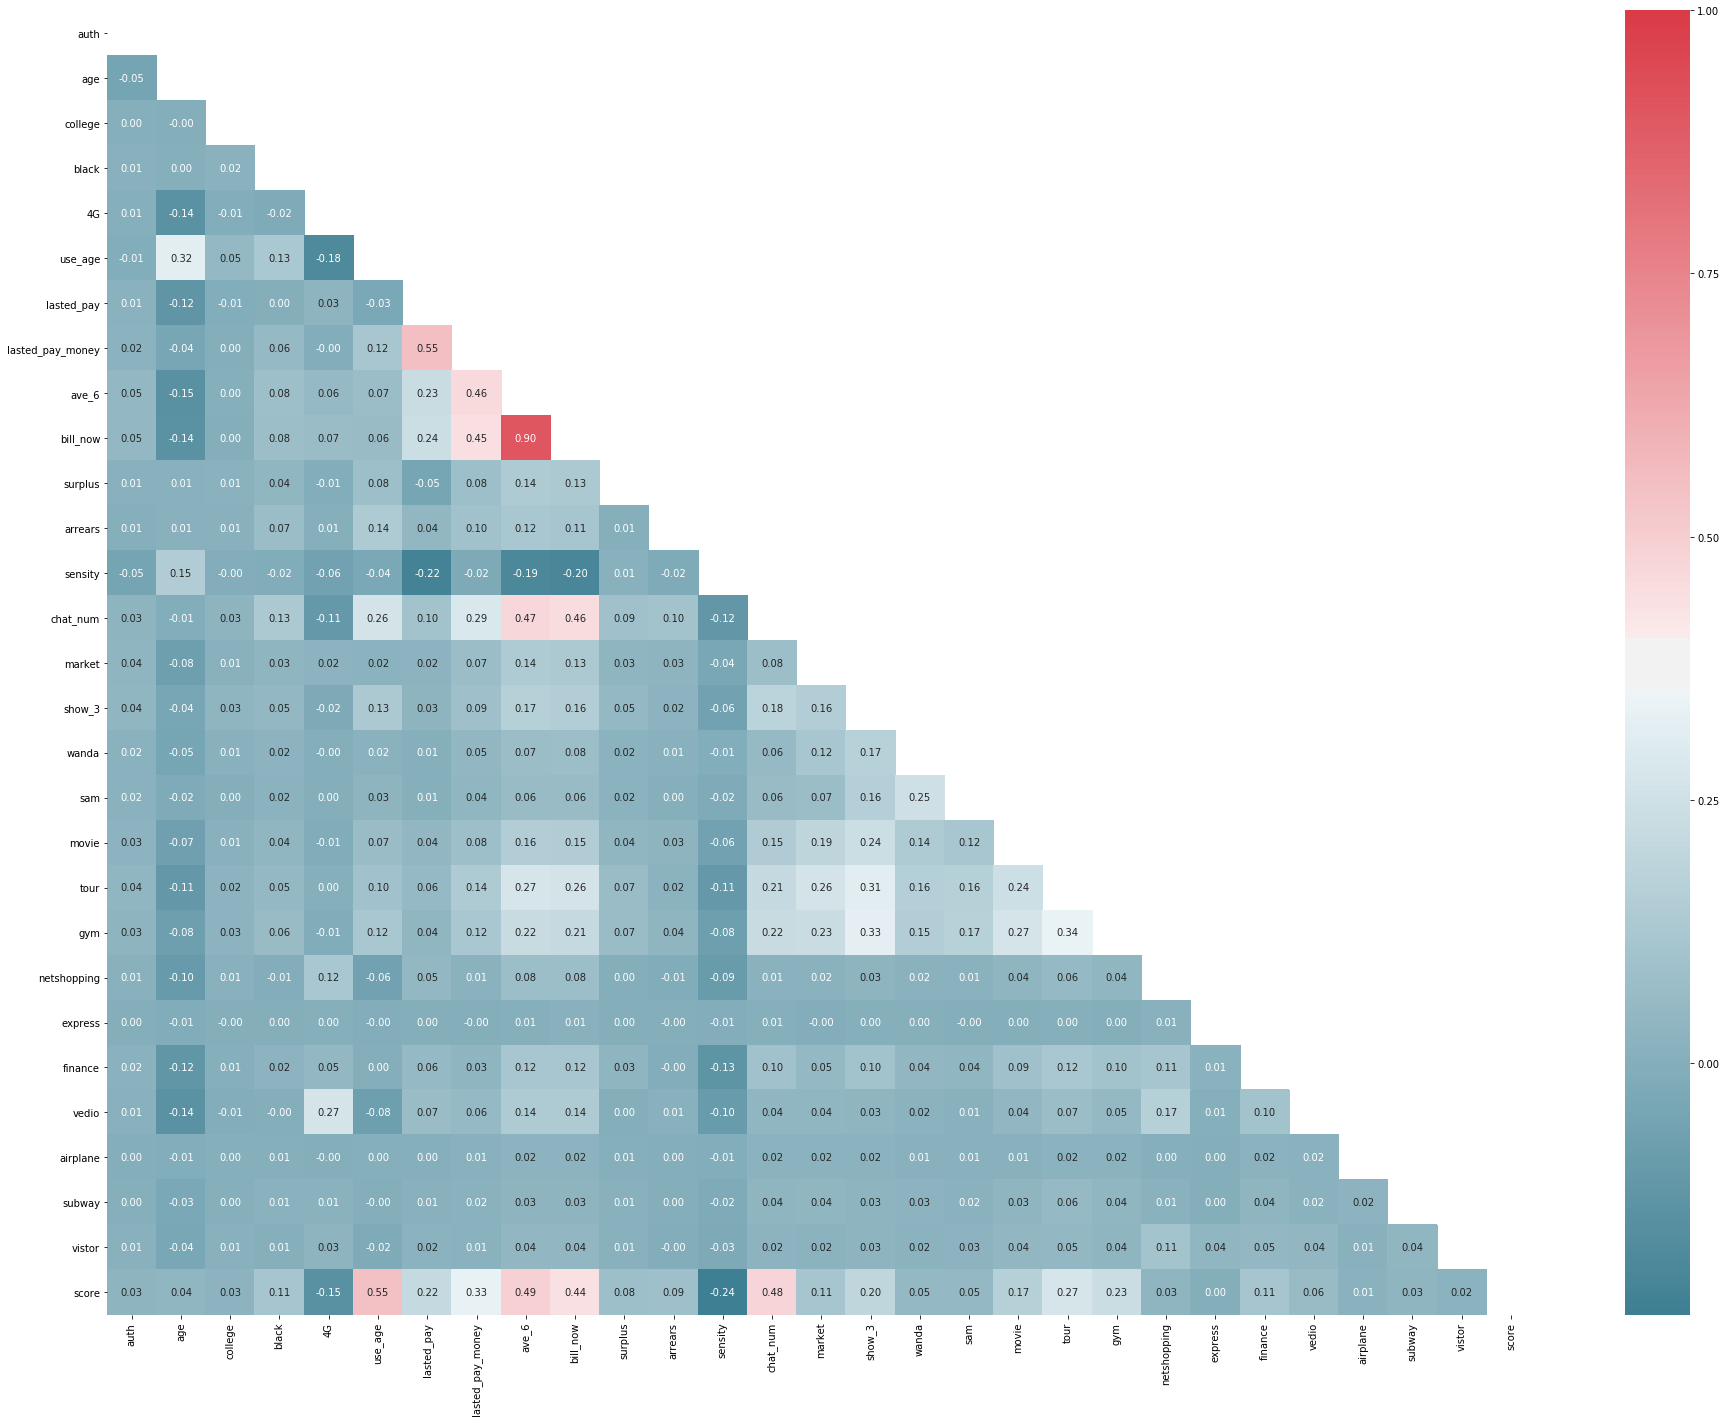

In [38]:
#热力图
columns = train_copy.columns.to_list()
mcorr  = train_copy[columns].corr()
mask = np.zeros_like(mcorr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(32,24))
cmap = sns.diverging_palette(220,10,as_cmap=True)
g = sns.heatmap(mcorr,mask=mask,cmap=cmap,square=False,annot=True,fmt=".2f")
plt.show()

use_age,lasted_pay_money,lasted_pay,ave_6,bill_now,chat_num,show_3,movie,tour

In [48]:
use_age = train_copy['use_age']
lasted_pay_money = train_copy['lasted_pay_money']
lasted_pay = train_copy['lasted_pay']
ave_6 = train_copy['ave_6']
bill_now = train_copy['bill_now']
chat_num = train_copy['chat_num']
show_3 = train_copy['show_3']
movie = train_copy['movie']
tour = train_copy['tour']

In [49]:
data = pd.concat([use_age,lasted_pay_money,lasted_pay,ave_6,bill_now,chat_num,show_3,movie,tour],axis=1)

In [50]:
data.head()

,use_age,lasted_pay_money,lasted_pay,ave_6,bill_now,chat_num,show_3,movie,tour
1,186.0,99.80,1.0,163.86,159.20,83.0,75.0,0.0,1.0
2,5.0,29.94,1.0,153.28,145.10,21.0,16.0,0.0,0.0
3,145.0,49.90,1.0,109.64,120.20,59.0,1.0,0.0,0.0
4,234.0,99.80,1.0,92.97,167.42,78.0,26.0,0.0,1.0
5,76.0,49.90,1.0,95.47,101.00,70.0,44.0,0.0,1.0
